# Airbnb Data Discovery

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')

## Loading the data
##### *Note: This is not a naive load of the data.  i.e. `pd.read_csv()`, and the print statements in the following cell were ran before `pd.read_csv()` was updated with the current parameters.

In [2]:
train_df = pd.read_csv('train_users_2.csv',
                       #index_col='id',
                       dtype={
                           'id':str,
                           'gender':'category',
                           'age':np.float64,
                           'signup_method':'category',
                           'signup_flow':'category',
                           'language':'category',
                           'affiliate_channel':'category',
                           'affiliate_provider':'category',
                           'first_affiliate_tracked':'category',
                           'signup_app':'category',
                           'first_device_type':'category',
                           'first_browser':'category',
                           'country_destination':'category'
                       },
                       na_values={
                           'gender':'-unknown-',
                           'first_affiliate_tracked':'untracked',
                           'country_destination':'NDF',
                           'first_browser':'-unkown-',
                           'first_device_type':['Desktop (Other)', 'SmartPhone (Other)', 'Other/Unknown']
                       },
                       verbose=True,
                       parse_dates=['date_account_created',
                                    'timestamp_first_active',
                                    'date_first_booking'],
                       infer_datetime_format=True)
train_df.head()

Tokenization took: 29.69 ms
Type conversion took: 64.83 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 21.87 ms
Type conversion took: 59.75 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 18.17 ms
Type conversion took: 49.46 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 20.18 ms
Type conversion took: 57.36 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 18.58 ms
Type conversion took: 56.61 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 21.17 ms
Type conversion took: 64.09 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 9.73 ms
Type conversion took: 33.20 ms
Parser memory cleanup took: 0.01 ms


id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

   gender   age signup_method signup_flow language affiliate_channel  \
0     NaN   NaN      facebook           0       en            direct   
1    MALE  38.0      facebook           0       en               seo   
2  FEMALE  56.0         basic           3       en            direct   
3  FEMALE  42.0      facebook           0       en            direct   
4     NaN  41.0         basic           0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct                     NaN        Web       Mac Desktop   
1             google                     NaN        Web       Mac Desktop   
2             direct                     NaN        Web   Windows Desktop   
3             direct                     NaN        Web       Mac Desktop   
4             direct                     NaN        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NaN  
1        Chrome                 NaN  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [3]:
train_df.dropna(axis='index', subset=['country_destination'], inplace=True)

In [6]:
train_df['country_destination'].loc[train_df['country_destination'] != 'US'].value_counts().sum()

26532

In [ ]:
print(train_df.gender.unique())
print(train_df.age.unique())
print(train_df.signup_method.unique())
print(train_df.signup_flow.unique())
print(train_df.language.unique())
print(train_df.affiliate_channel.unique())
print(train_df.affiliate_provider.unique())
print(train_df.first_affiliate_tracked.unique())
print(train_df.signup_app.unique())
print(train_df.first_device_type.unique())
print(train_df.first_browser.unique())
print(train_df.country_destination.unique())

In [ ]:
train_df.info()

## Observing the unique values we find & .info:
#### <u/>Gender column</u>: There are three unique values for this column besides `'NaN'`: `'male'`, `'female'`, and `'other'`.  We will keep `'other'` unique from `'NaN'` because some individuals do not identify with binary gender categories.  This column is between 1/2 and 2/3 null!!
#### <u/>Age column</u> : this column will remain a float until cleansed, at which time data abnormalities will be explored.  Note: this column is approximately half null values.
#### <u/>Signup Method column</u>: only two remarks here: (1) the lack of `'NaN'` values indicate that this column is complete, and (2) there are only three unique values.
#### <u/>Signup Flow column</u>: the page that lead the user to the signup page.  It is only 17 integers, so I'll leave them as categories for now.  Note that there is a value 0 here.  It might be possible that this represents the homepage, or users that came straight to the login page especially since there were no null values for this column.  We will explore this more later.
#### <u/>Language column</u>: The language preference of the user.  There are 25 of these!  This seems like a lot considering all the IP addresses are based in the US.  Is the US truly a great "melting pot", or is it possible that Also, note that there are no null entries for this column.
#### <u/>Affiliate Channel column</u>: The 8 strings that describe the type of paid marketing that lead the user to Airbnb.  Any sale can be attributed to some form of marketing, hence the decision to keep the `'other'` value instead of `'NaN'`.
#### 

In [ ]:
print(train_df.signup_flow.value_counts())

In [ ]:
print(train_df.affiliate_channel.value_counts())

In [ ]:
print(train_df.affiliate_provider.value_counts())

### Drop rows for users over 100 yrs old

In [ ]:
train_df['age'].loc[train_df['age'] > 100]

In [ ]:
train_df.drop(train_df['age'].loc[train_df['age'] > 100].index, axis=0, inplace=True)

#### However, there are a couple oddities: (1) there are a large number of people over the age of 100, 

In [ ]:
train_df.loc[train_df.age > 2000, 'age'].value_counts()

In [ ]:
train_df.loc[train_df.age == 2008.0,
             'date_account_created']

In [ ]:
train_df['age_mistakes'] = train_df.loc[train_df.age > 2000, 'age'] = 1

In [ ]:
train_df.loc[train_df.age > 2000, 'age'].value_counts()

In [ ]:
train_df.age[train_df.age > 90.0]

In [ ]:
train_df['age_pranks'] = train_df.loc[train_df.age > 2000, 'age'] = 1

## Preparing the data

### Convert age column to integers

In [4]:
train_df['age'] = train_df['age'].loc[train_df['age'] != np.NaN].fillna(-1).astype(np.int32)

In [5]:
train_df['age']

2         56
3         42
4         41
5         -1
6         46
7         47
8         50
9         46
10        36
12        -1
15        33
17        31
19        29
20        -1
21        30
22        40
25        26
27        32
28        35
29        37
30        42
36        31
41        30
44        -1
45        44
46        -1
47        -1
49        34
51        -1
52        33
          ..
213358    29
213360    33
213369    -1
213370    27
213371    -1
213372    41
213373    -1
213376    -1
213378    38
213384    22
213385    39
213388    30
213390    30
213398    39
213400    53
213401    45
213402    32
213404    -1
213405    23
213406    35
213407    21
213408    69
213409    28
213410    33
213412    50
213415    55
213439    43
213441    34
213443    36
213445    23
Name: age, Length: 88908, dtype: int32

In [6]:
train_df['age'] = pd.cut(train_df['age'], bins=[5*x for x in range(1,24)])    

In [51]:
train_df['age'].value_counts()

(25, 30]      16560
(30, 35]      15916
(35, 40]       9400
(20, 25]       6604
(40, 45]       5774
(45, 50]       3765
(50, 55]       2784
(55, 60]       2167
(60, 65]       1519
(15, 20]       1142
(65, 70]        937
(100, 105]      877
(70, 75]        373
(75, 80]        123
(105, 110]       62
(80, 85]         45
(85, 90]         37
(90, 95]         29
(95, 100]        19
(110, 115]        6
(10, 15]          3
(5, 10]           0
Name: age, dtype: int64

In [ ]:
for column in train_df.columns[4:]:
    print(train_df[column].value_counts())

<IPython.core.display.Javascript object>


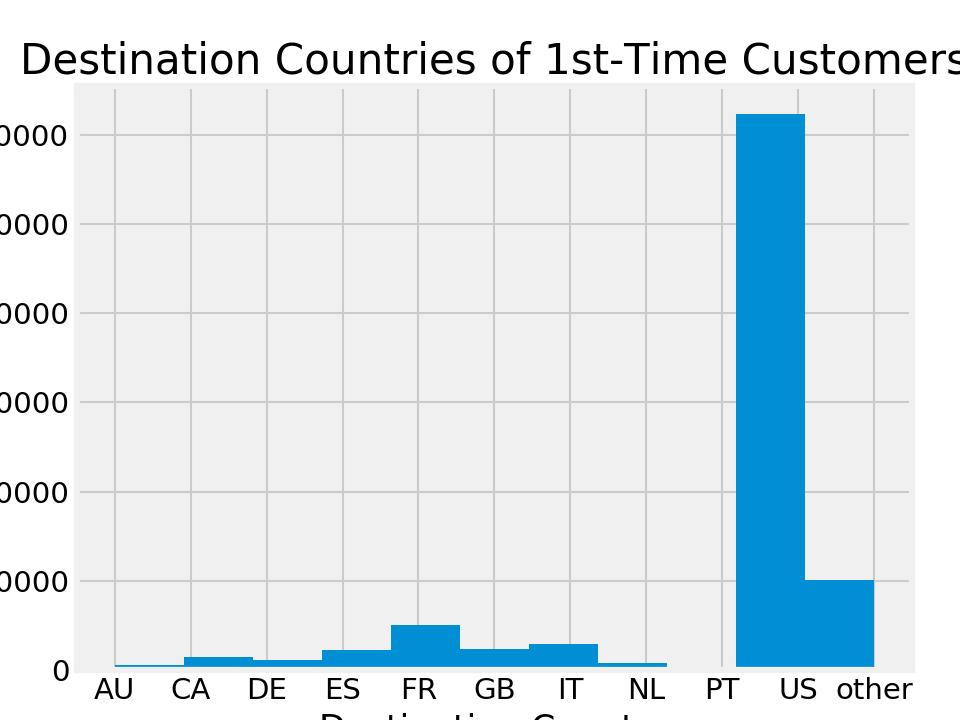

In [7]:
plt.hist(train_df['country_destination'], bins=11, histtype='bar')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.show()

In [ ]:
plt.hist(train_df['country_destination'].loc[train_df['country_destination'] != 'US'], bins=10, histtype='bar', align='mid')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.show()

In [ ]:
train_df['first_device_type'].value_counts()

In [ ]:
plt.hist(train_df['first_device_type'], bins=9, histtype='bar')
plt.title('Destination Countries of 1st-Time Customers')
plt.ylabel('Number of Bookings')
plt.xlabel('Destination Country')
plt.xticks(rotation='25')
plt.ticklabel_format()
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
train_sets = [('X_train{0}'.format(i), 'Y_train{0}'.format(i)) for i in np.arange(10)]
test_sets = [('X_train{0}'.format(i), 'Y_train{0}'.format(i)) for i in np.arange(10)]

In [9]:
train_df_dummies = pd.get_dummies(train_df.loc[:,'gender':'first_browser'], drop_first=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df_dummies,
    train_df['country_destination'], test_size=0.3, random_state=1,
    stratify=train_df['country_destination'])

In [11]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0, cache_size=20000)
svm.fit(X_train, y_train)

SVC(C=10.0, cache_size=20000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [12]:
svm.score(X_test, y_test)

0.7010085104787613

In [15]:
y_pred = svm.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score

In [16]:
confusing_matrix = confusion_matrix(y_test, y_pred)

In [22]:
confusion_df = pd.DataFrame(confusing_matrix, index=svm.classes_, columns=svm.classes_)

In [24]:
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'

In [25]:
confusion_df

Predicted  AU  CA  DE  ES  FR  GB  IT  NL  PT     US  other
Actual                                                     
AU          0   0   0   0   0   0   0   0   0    162      0
CA          0   0   0   0   0   0   0   0   0    427      1
DE          0   0   0   0   0   0   0   0   0    318      0
ES          0   0   0   0   0   0   0   0   0    675      0
FR          0   0   1   0   0   0   0   0   0   1505      1
GB          0   0   0   0   0   0   0   0   0    697      0
IT          0   0   0   1   0   0   0   0   0    848      2
NL          0   0   0   0   0   0   0   0   0    228      1
PT          0   0   0   0   0   0   0   0   0     65      0
US          0   0   0   0   1   0   3   0   0  18688     21
other       0   0   0   0   0   0   0   0   0   3018     10

In [19]:
f1 = f1_score(y_test, y_pred, average='micro')

In [20]:
f1

0.7010085104787613

In [63]:
26,631.    26,673  99.84% predicted US  70.06% actually US

{'C': 10.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [64]:
svm.decision_function(X_test)

array([[ 2.89714247,  3.9474529 ,  1.87857116, ..., -0.25627858,
        10.28999908,  9.22968261],
       [ 0.80540801,  2.8953582 ,  5.0216978 , ..., -0.27727497,
        10.25235827,  9.2042711 ],
       [ 2.93052088,  1.89717389,  3.88918412, ..., -0.24239243,
        10.25344097,  9.2035167 ],
       ...,
       [ 0.76980739,  2.95547496,  4.01488806, ..., -0.34304982,
        10.27040109,  9.20535316],
       [ 1.84907403,  3.90133005,  2.85675396, ..., -0.33834142,
        10.26154103,  9.21733146],
       [ 0.79945164,  3.993595  ,  1.85326915, ..., -0.2725104 ,
        10.25366218,  9.20427888]])

In [65]:
svm.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
svm.n_support_

array([  377,  1000,   743,  1574,  3516,  1627,  1984,   533,   152,
       23419,  7066], dtype=int32)

In [67]:
svm.dual_coef_

array([[ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -5.7695734 ],
       ...,
       [  0.        ,   0.37541613,   4.76879723, ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
         -0.        ,  -0.        ],
       [ 10.        ,  10.        ,  10.        , ..., -10.        ,
        -10.        , -10.        ]])

In [68]:
svm.class_weight_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [69]:
svm.classes_

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US',
       'other'], dtype=object)